# Chapter II 

## Introduction to relational plots and subplots

Many questions in data science are centered around describing the relationship between two quantitative variables. Seaborn calls plots that visualize this relationship **"relational plots"**.

So far we've seen several examples of questions about the relationship between two quantitative variables, and we answered them with scatter plots. These examples include:

* Height vs. weight

* Number of school absences vs. final grade

* GDP vs. percent literate


While looking at a relationship between two variables at a high level is often informative, sometimes we suspect that the relationship may be different within certain subgroups. 

In the last chapter, we started to look at subgroups by using the **"hue"** parameter to visualize each subgroup using a different color on the same plot.

In this lesson, we'll try out a different method: creating a separate plot per subgroup.

### Introducing relplot()   

To do this, we're going to introduce a new Seaborn function: ```"relplot()"```.

**"relplot()"** stands for **"relational plot"** and enables you to visualize the relationship between two quantitative variables using either scatter plots or line plots.

Using **"relplot()"** gives us a big advantage: the ability to create subplots in a single figure. 

Because of this advantage, we'll be using **"relplot()" instead of "scatterplot()"** for the rest of the course.

Let's return to our scatter plot of total bill versus tip amount from the tips dataset. First, we see how to create a scatter plot with the "scatterplot" function. 

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="total_bill", 
                y="tip", 
                data=tips)

plt.show()                
```

To make it with "relplot()" instead, we change the function name to **"relplot()"** and use the **"kind"** parameter to specify what kind of relational plot to use - scatter plot or line plot. In this case, we'll set kind equal to the word "scatter".

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.relplot(x="total_bill", 
            y="tip", 
            data=tips, 
            kind="scatter")

plt.show()            
```

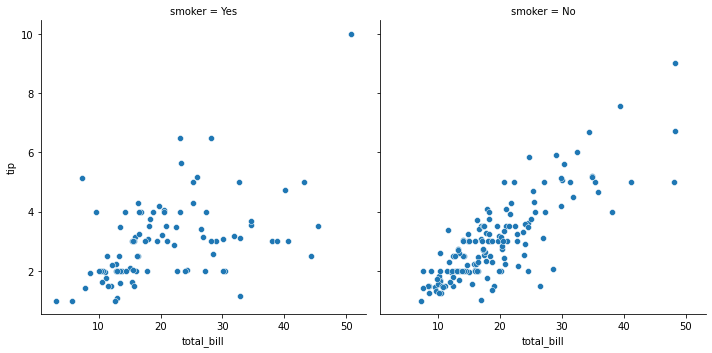

In [3]:
# Subplots in Columns
'''By setting "col" equal to "smoker", we get a separate scatter plot for smokers and non-smokers,
arranged horizontally in columns.
'''
import seaborn as sns 
import matplotlib.pyplot as plt 
# Using the tips data
tips = sns.load_dataset("tips")
## ----------------------------- ##
sns.relplot(x="total_bill", 
            y="tip", 
            data=tips, 
            kind="scatter", 
            col="smoker")

plt.show()

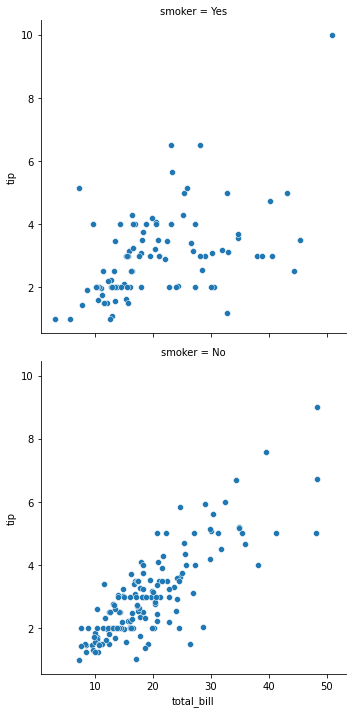

In [4]:
# Subplots in rows
''' If you want to arrange these vertically in rows instead, 
    you can use the "row" parameter instead of "col".
'''
sns.relplot(x="total_bill", 
            y="tip", 
            data=tips, 
            kind="scatter", 
            row="smoker")

plt.show()

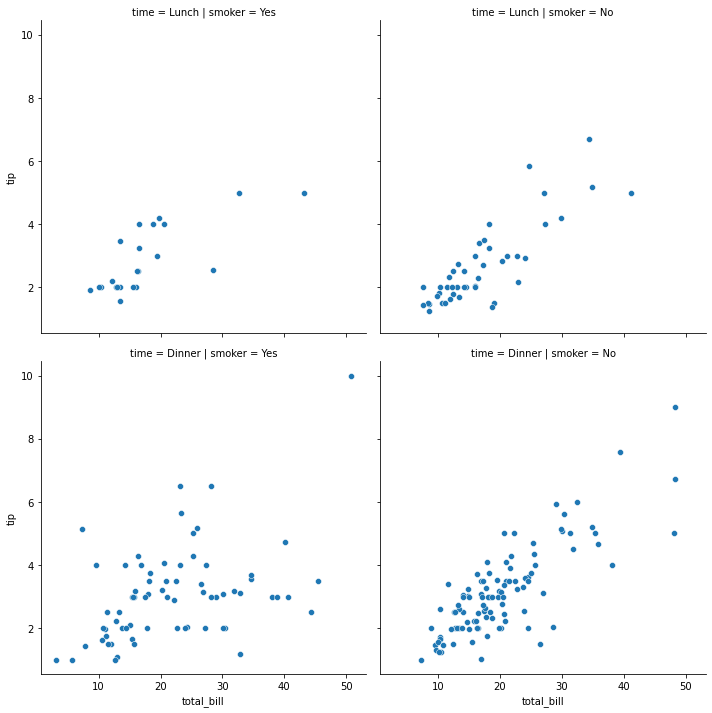

In [6]:
# Subplots in rows and columns
''' 
It is possible to use both "col" and "row" at the same time. 
Here, we set "col" equal to smoking status and "row" equal to the time of day (lunch or dinner). 
Now we have a subplot for each combination of these two categorical variables.
'''

sns.relplot(x="total_bill", 
            y="tip", 
            data=tips, 
            kind="scatter", 
            col="smoker",
            row="time")

plt.show()

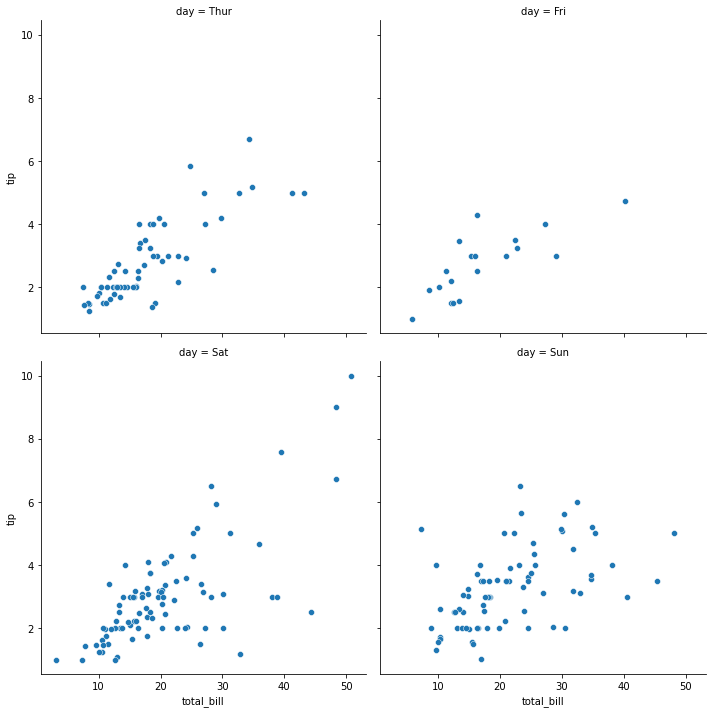

In [8]:
# Wrapping Columns
'''
you can use the "col_wrap" parameter to specify how many subplots you want per row.
Here, we set "col_wrap" equal to two plots per row.
'''

sns.relplot(x="total_bill", 
            y="tip",
            data=tips, 
            kind="scatter",
            col="day",
            col_wrap=2, 
            # You can also order the columns with col_order: 
            col_order=["Thur", 
                       "Fri", 
                       "Sat",
                       "Sun"])


plt.show()

## Customizing Scatter Plots

Scatter plots are a great tool for visualizing the relationship between two quantitative variables. 
We've seen a few ways to add more information to them as well, by creating subplots or plotting 
subgroups with different colored points. 

In addition to these, Seaborn allows you to add more information to scatter plots by varying the 
size, the style, and the transparency of the points. 

All of these options can be used in both the "scatterplot()" and "relplot()" functions.

**We've seen:**

* Subplots(```col``` and ```row```)
* Subgroups with color (```hue```)

**New Customizations:**

* Subgroups with point size and style
* Changing point transparency

The first customization we'll talk about is **point size**. Here, we're creating a scatter plot of 
total bill versus tip amount. We want each point on the scatter plot to be sized based on the number 
of people in the group, with larger groups having bigger points on the plot. 

To do this, we'll set the **"size"** parameter equal to the variable name **"size"** from our 
dataset. 

As this example demonstrates, varying point size is best used if the variable is either a 
quantitative variable or a categorical variable that represents different levels of something, like 
**"small", "medium", and "large"**. 

This plot is a bit hard to read because all of the points are of the same color.

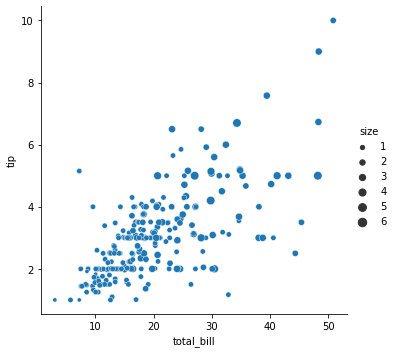

In [9]:
sns.relplot(x="total_bill", 
            y="tip",
            data=tips,
            kind="scatter",
            size="size")

plt.show()

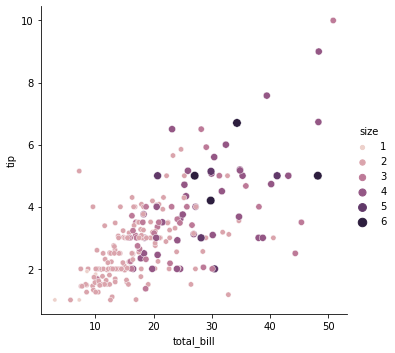

In [10]:
# Point size and hue
''' 
We can make it easier by using the "size" parameter in combination with the "hue" parameter.
To do this, set "hue" equal to the variable name "size". 
'''

sns.relplot(x="total_bill", 
            y="tip", 
            data=tips,
            kind="scatter",
            size="size",
            hue="size")

plt.show()

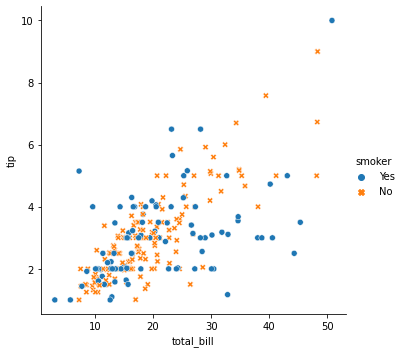

In [11]:
# Subgroups with point style
''' 
The next customization we'll look at is the point style. 
Setting the "style" parameter to a variable name will use different point styles for each value of
the variable. 
'''

sns.relplot(x="total_bill",
            y="tip",
            data=tips,
            kind="scatter",
            hue="smoker",
            style="smoker")

plt.show()

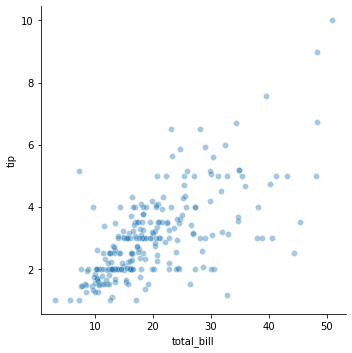

In [12]:
# Changing point transparency
''' 
The last customization we'll look at is point transparency. 
Setting the "alpha" parameter to a value between 0 and 1 will vary the transparency of the points in the plot
'''

sns.relplot(x="total_bill", 
            y="tip",
            data=tips,
            kind="scatter",
            alpha=0.4)

plt.show()

## Introduction to line Plots

In Seaborn, we have two types of relational plots: **scatter plots** and **line plots**. While each 
point in a scatter plot is assumed to be an independent observation, line plots are the 
visualization of choice when we need to track the same thing over time.

**Scatter plots:**

* Each plot point is an independent observation

**Line Plots:**

* Each plot point represents the same "thing", typically tracked over time

By specifying ```kind="line"``, we can create a line plot.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="hour", y="NO2_mean", 
            data=air_df_mean, 
            kind="line")

plt.show()            
```

We can also track subgroups over time with line plots. Assume we have average nitrogen dioxide level for each region (North, South, East, West) for each hour in the day.

Setting the **"style"** and **"hue"** parameters equal to the variable name **"location"** creates 
different lines for each region that vary in both line style and color.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="hour", y="NO2_mean", 
            data=air_df_mean, 
            kind="line",
            style="location", 
            hue="location")

plt.show()
```

Setting the **"markers"** parameter equal to **"True"** will display a marker for each data point. 
The marker will vary based on the subgroup you've set using the "style" parameter.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="hour", y="NO2_mean", 
            data=air_df_mean, 
            kind="line",
            style="location", 
            hue="location",
            markers=True)

plt.show()
```

If you don't want the line styles to vary by subgroup, set the **"dashes"** parameter equal to **"False"**.

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="hour", y="NO2_mean", 
            data=air_df_mean, 
            kind="line",
            style="location", 
            hue="location",
            markers=True, 
            dashes=False)

plt.show()
```

### Multiple observations per x-value

```python
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="hour", y="NO2_", 
            data=air_df, 
            kind="line")

plt.show()            
```

This is the line plot. If a line plot is given multiple observations per x-value, it will aggregate 
them into a single summary measure. By default, it will display the mean.



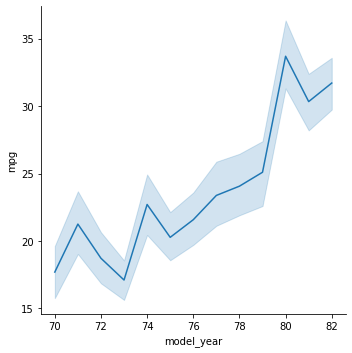

In [13]:
# Exercise
# Interpreting line plots
import pandas as pd 
# DataFrame ==> mpg.csv
mpg = pd.read_csv("datasets/mpg.csv")

# Create Line Plot
sns.relplot(x="model_year", y="mpg", 
            data=mpg, 
            kind="line")

# Show the plot
plt.show()

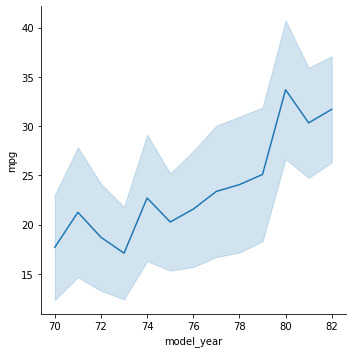

In [14]:
# Visualizing standart deviation with line plots

# Make the shaded are show the standart deviation
sns.relplot(x="model_year", y="mpg", 
            data=mpg, kind="line",
            ci="sd")
# Show the plot
plt.show()

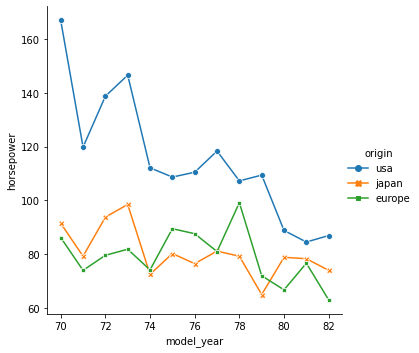

In [17]:
# plotting subgroups in line plots

# Create line plot of model year vs. horsepower
sns.relplot(x="model_year", y="horsepower", 
            data=mpg, kind="line",
            ci=None,
            # Change to create subgroups for country of origin
            style="origin", 
            hue="origin",
            # Add Markers and make each line have the same style
            markers=True,
            dashes=False)
# Show the plot
plt.show()